# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Malware Type.

Assume that the dataset is already pre-processed:
1. Removal of nan values
2. Data Cleaning (Removal of False Labels and *Removal/Aggregation of malware types of poor quantity*)
3. Inverse Ordinal Encoding (for representation purposes only)

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Manual_DBSCAN_Encoded_Clustering.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['type'].value_counts().index)
        counts = list(df_copy['type'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())
    print("Number of Samples Remaining:", malicious_df.shape[0])

## DataFrame Preview

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_94,t_95,t_96,t_97,t_98,t_99,malware,type,pattern,cluster
0,071e8c3f8922e186e57548cd4c703a5d,RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,...,NtMapViewOfSection,NtClose,GetSystemMetrics,NtAllocateVirtualMemory,CreateActCtxW,GetSystemWindowsDirectoryW,1,trojan,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",0
1,33f8e6d08a6aae939f25a8e0d63dd523,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,...,GetSystemWindowsDirectoryW,NtCreateFile,NtCreateSection,NtMapViewOfSection,NtClose,GetSystemMetrics,1,pua,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",1
2,b68abd064e975e1c6d5f25e748663076,SetUnhandledExceptionFilter,OleInitialize,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,...,RegCloseKey,RegOpenKeyExA,RegQueryValueExA,RegCloseKey,RegEnumKeyExA,RegOpenKeyExA,1,trojan,"SetUnhandledExceptionFilter,OleInitialize,LdrL...",2
3,72049be7bd30ea61297ea624ae198067,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,...,NtWriteVirtualMemory,NtFreeVirtualMemory,NtAllocateVirtualMemory,NtWriteVirtualMemory,NtProtectVirtualMemory,NtWriteVirtualMemory,1,trojan,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",3
4,c9b3700a77facf29172f32df6bc77f48,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,RegEnumKeyExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,1,trojan,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",4
5,cc6217be863e606e49da90fee2252f52,LdrGetProcedureAddress,NtAllocateVirtualMemory,LdrGetProcedureAddress,NtAllocateVirtualMemory,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,RegQueryValueExW,RegCloseKey,GetVolumeNameForVolumeMountPointW,LdrGetProcedureAddress,RegOpenKeyExW,RegCloseKey,1,trojan,"LdrGetProcedureAddress,NtAllocateVirtualMemory...",5
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOpenKey,NtQueryValueKey,NtClose,LdrGetDllHandle,LdrGetProcedureAddress,...,LdrGetDllHandle,FindResourceExW,LoadResource,FindResourceExW,LoadResource,DrawTextExW,1,downloader,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp...",6
7,164b56522eb24164184460f8523ed7e2,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,GetSystemDirectoryW,LdrLoadDll,CreateThread,FindResourceExW,NtClose,GetSystemMetrics,1,adware,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",7
8,56ae1459ba61a14eb119982d6ec793d7,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,NtClose,WSAStartup,NtAllocateVirtualMemory,CreateThread,LdrLoadDll,LdrGetProcedureAddress,1,adware,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",8
9,c4148ca91c5246a8707a1ac1fd1e2e36,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,NtAllocateVirtualMemory,SetUnhandledExceptionFilter,...,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,NtOpenProcess,NtClose,GetSystemMetrics,1,downloader,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",9


(40159, 105)

<Axes: ylabel='type'>

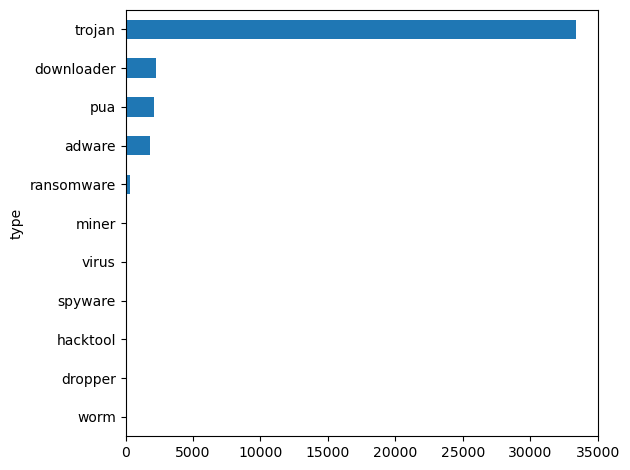

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['type'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

print("Raw Clustered malicious samples")
how_many_clusters()

Raw Clustered malicious samples
Number of Clusters: 11492
Number of single-item Clusters: 9521
Number of Samples Remaining: 40159


## How many clusters are there?

In [4]:
# #Prior to noise removal
# print("Prior to noise removal")
# how_many_clusters()

In [5]:
# #DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
# unique_clusters = get_unique_clusters(malicious_df)
# for u in unique_clusters:
#     if len(malicious_df[malicious_df['cluster'] == u]['type'].unique()) > 1:
#         malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

# print("After removing yet unlabelled malicious samples\n and clusters with more than 1 malware type")
# how_many_clusters()

In [6]:
# #REMOVE SINGLE ITEM CLUSTERS
# unique_clusters = get_unique_clusters(malicious_df)
# for u in unique_clusters:
#     if malicious_df[malicious_df['cluster'] == u].shape[0] == 1:
#         malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)

# print("After removing single-item clusters")
# how_many_clusters()

## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

type
trojan        33352
downloader     2249
pua            2135
adware         1815
ransomware      341
miner           125
virus            79
spyware          48
hacktool          7
dropper           5
worm              3
Name: count, dtype: int64

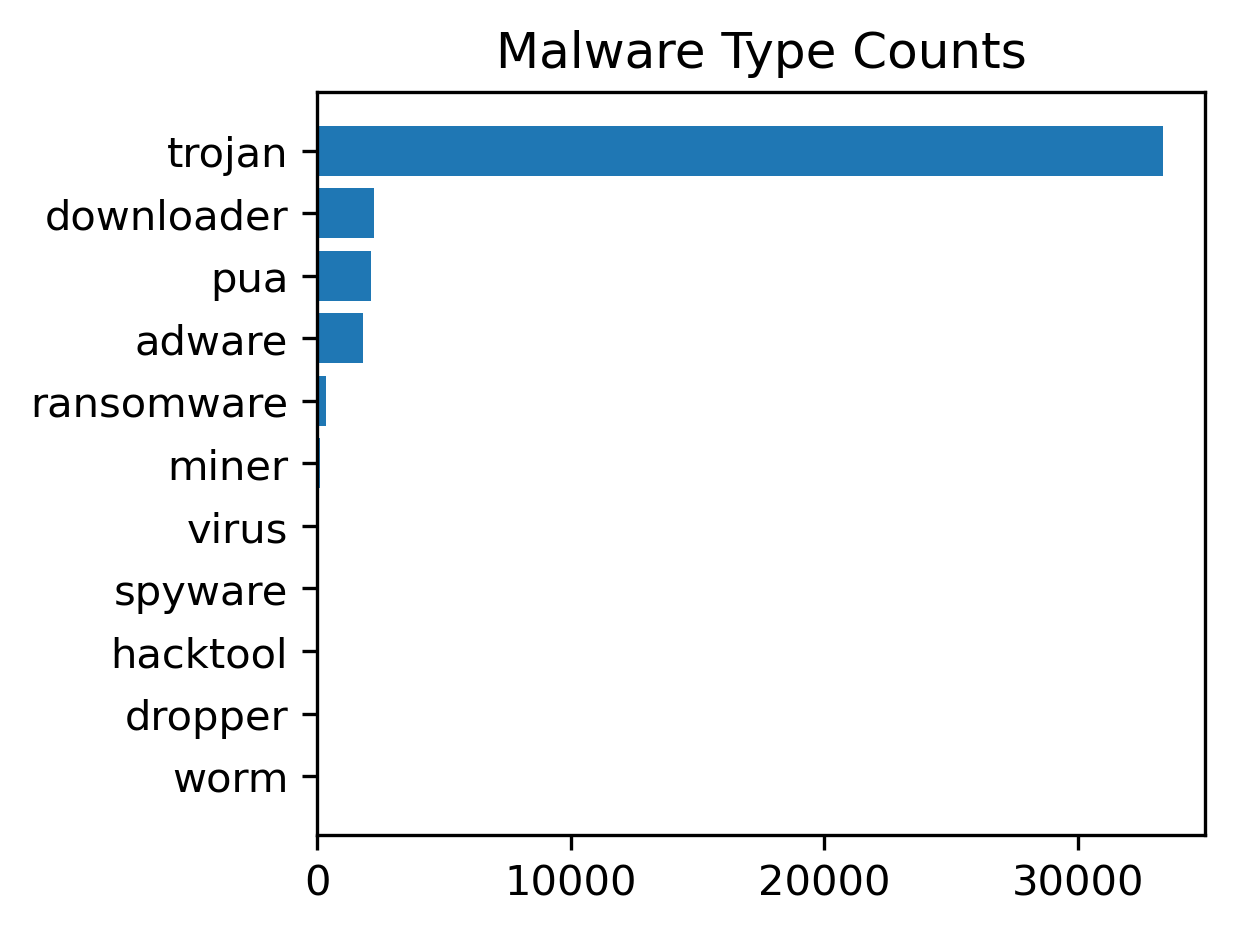

In [7]:
output = malicious_df['type'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['type'].value_counts().index, malicious_df['type'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 0: trojan (3295); pua (6); adware (2); spyware (1); downloader (1); 
CLUSTER 1: pua (109); trojan (12); adware (4); downloader (3); 
CLUSTER 2: trojan (8); 
CLUSTER 3: trojan (1); 
CLUSTER 4: trojan (1); 
CLUSTER 5: trojan (1); 
CLUSTER 6: downloader (162); trojan (7); adware (2); virus (1); 
CLUSTER 7: adware (1); 
CLUSTER 8: trojan (451); adware (33); pua (2); 
CLUSTER 9: downloader (966); pua (119); trojan (21); adware (7); ransomware (1); 
CLUSTER 10: trojan (16); adware (2); virus (2); downloader (2); pua (2); hacktool (1); miner (1); 
CLUSTER 11: trojan (10); 
CLUSTER 12: trojan (1); 
CLUSTER 13: trojan (333); adware (9); pua (1); 
CLUSTER 14: trojan (23); 
CLUSTER 15: trojan (12); 
CLUSTER 16: trojan (1); 
CLUSTER 17: trojan (701); adware (30); pua (5); downloader (2); 
CLUSTER 18: trojan (2); 
CLUSTER 19: trojan (516); adware (56); pua (3); 
CLUSTER 20: trojan (1); 
CLUSTER 21: trojan (1024); adware (11); pua (3); spyware (2); 
CLUSTER 22: trojan (29); 
CLUSTER 23: troj

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['type'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['type'].unique())):
    matching = malicious_df[malicious_df['type'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 11

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 10160
Matching Clusters: [0, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 33, 34, 35, 36, 37, 38, 39, 40, 26, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 8, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 1, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 83, 84, 85, 86, 87, 89, 91, 55, 94, 96, 97, 98, 99, 100, 101, 102, 104, 105, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 29, 150, 151, 153, 154, 155, 157, 158, 159, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 92, 177, 178, 179, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 207, 208, 210, 211, 212, 214, 215, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 229, 231, 232, 

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
10,trojan,10160,"[0, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18..."
7,adware,813,"[7, 8, 55, 88, 31, 106, 110, 135, 156, 160, 16..."
8,pua,784,"[1, 25, 28, 29, 45, 92, 93, 107, 149, 152, 26,..."
9,downloader,117,"[6, 9, 26, 30, 31, 42, 69, 77, 103, 148, 203, ..."
5,miner,79,"[82, 206, 256, 266, 856, 102, 47, 1566, 1838, ..."
4,virus,69,"[90, 349, 418, 590, 6, 731, 918, 1092, 1141, 1..."
6,ransomware,38,"[192, 194, 186, 361, 676, 1535, 1602, 1699, 17..."
3,spyware,15,"[95, 0, 21, 196, 603, 3365, 3690, 1567, 4623, ..."
2,hacktool,7,"[10, 476, 1257, 1222, 11091, 11356, 10648]"
1,dropper,4,"[282, 31, 2023, 8549]"


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['type'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               548127
LdrLoadDll                           326998
LdrGetDllHandle                      216319
RegOpenKeyExW                        205692
LoadResource                         171409
FindResourceExW                      167824
NtClose                              161696
RegQueryValueExW                     145930
RegCloseKey                          134071
NtAllocateVirtualMemory              125861
NtQueryValueKey                       80045
NtOpenKey                             78843
GetSystemMetrics                      71530
GetSystemTimeAsFileTime               61271
SetErrorMode                          35725
GetSystemInfo                         32018
NtProtectVirtualMemory                27825
NtDelayExecution                      26882
RegQueryInfoKeyW                      25593
NtCreateFile                          23976
DrawTextExW                           23272
LoadStringW                           22690
NtFreeVirtualMemory      

adware
LdrGetProcedureAddress               29719
LdrLoadDll                           17137
LdrGetDllHandle                      14452
RegOpenKeyExW                        11124
NtClose                              10646
RegCloseKey                           9368
RegQueryValueExW                      8256
NtAllocateVirtualMemory               7791
SetErrorMode                          4955
NtOpenKey                             4454
NtQueryValueKey                       4126
GetSystemTimeAsFileTime               3230
NtCreateFile                          2799
GetSystemWindowsDirectoryW            2343
GetSystemDirectoryW                   2231
LoadResource                          2049
NtMapViewOfSection                    2048
NtReadFile                            1879
GetSystemMetrics                      1841
NtFreeVirtualMemory                   1784
RegOpenKeyExA                         1747
NtCreateSection                       1547
SetFilePointer                        1525
Find

pua
LdrGetProcedureAddress               40755
LdrGetDllHandle                      21618
LdrLoadDll                           21085
NtClose                              13343
NtAllocateVirtualMemory              11072
RegOpenKeyExW                         8932
RegCloseKey                           8228
RegQueryValueExW                      5881
SetErrorMode                          5296
NtOpenKey                             4845
NtQueryValueKey                       4480
GetSystemMetrics                      3512
LoadResource                          3190
NtReadFile                            3149
FindResourceExW                       3064
NtCreateFile                          3053
SetFilePointer                        3046
NtFreeVirtualMemory                   2767
GetSystemWindowsDirectoryW            2570
NtMapViewOfSection                    2539
GetSystemTimeAsFileTime               2506
GetSystemDirectoryW                   2335
NtProtectVirtualMemory                2056
RegOpen

downloader
LdrGetProcedureAddress               61127
LdrGetDllHandle                      39862
LdrLoadDll                           19778
RegCloseKey                          12705
RegOpenKeyExW                        11211
NtAllocateVirtualMemory              10893
RegQueryValueExW                      8453
NtClose                               8350
FindResourceExW                       6666
LoadResource                          6659
RegOpenKeyExA                         3576
GetSystemTimeAsFileTime               2940
NtOpenKey                             2763
NtQueryValueKey                       2586
RegQueryValueExA                      2566
NtFreeVirtualMemory                   2492
GetSystemMetrics                      2028
GetSystemWindowsDirectoryW            1807
SetErrorMode                          1597
NtMapViewOfSection                    1355
SetUnhandledExceptionFilter           1331
LoadStringW                           1313
NtOpenProcess                         1176


miner
LdrGetProcedureAddress               1224
NtClose                               983
LdrLoadDll                            705
LdrGetDllHandle                       625
RegOpenKeyExW                         511
NtCreateFile                          506
NtQueryAttributesFile                 506
RegCloseKey                           471
NtAllocateVirtualMemory               421
NtMapViewOfSection                    406
NtCreateSection                       389
RegQueryValueExW                      372
NtUnmapViewOfSection                  338
NtReadFile                            277
NtOpenKey                             273
NtQueryValueKey                       245
GetSystemWindowsDirectoryW            237
SetFilePointer                        211
GetSystemTimeAsFileTime               209
GetSystemDirectoryW                   202
LdrUnloadDll                          192
GetSystemInfo                         184
LoadResource                          183
FindResourceExW             

virus
LdrGetProcedureAddress               1052
LdrLoadDll                            643
NtClose                               577
RegCloseKey                           512
RegOpenKeyExW                         430
LdrGetDllHandle                       406
NtReadFile                            382
NtAllocateVirtualMemory               321
RegQueryValueExW                      305
NtWriteFile                           269
NtOpenKey                             171
NtCreateFile                          169
LoadResource                          167
FindResourceExW                       167
SetFilePointer                        160
NtQueryValueKey                       155
RegOpenKeyExA                         131
SetErrorMode                          109
GetSystemWindowsDirectoryW            104
NtFreeVirtualMemory                   102
GetSystemMetrics                       86
NtMapViewOfSection                     85
NtDuplicateObject                      75
GetTempPathW                

ransomware
NtQuerySystemInformation       7810
NtAllocateVirtualMemory        5404
NtFreeVirtualMemory            4844
NtClose                        2129
LdrGetProcedureAddress         1519
RegOpenKeyExW                  1178
RegCloseKey                    1143
RegQueryValueExW               1129
NtOpenKey                       813
LdrGetDllHandle                 760
LdrLoadDll                      751
NtQueryValueKey                 737
NtCreateFile                    651
NtMapViewOfSection              628
NtCreateSection                 627
CreateThread                    441
NtOpenFile                      348
NtCreateMutant                  339
NtQueryInformationFile          328
CryptAcquireContextW            326
GetSystemWindowsDirectoryW      324
NtDelayExecution                320
GetFileSize                     317
GetTempPathW                    310
CreateToolhelp32Snapshot        124
Process32NextW                  113
Process32FirstW                 113
GetSystemTimeAsFi

spyware
LdrGetProcedureAddress               800
FindResourceExW                      636
LoadResource                         557
LdrGetDllHandle                      416
LdrLoadDll                           409
GetSystemMetrics                     218
NtAllocateVirtualMemory              213
NtClose                              212
LoadStringA                          126
RegCloseKey                          111
NtQueryValueKey                      104
NtOpenKey                             95
RegOpenKeyExA                         91
DrawTextExW                           69
RegOpenKeyExW                         60
NtCreateFile                          47
NtCreateSection                       45
RegQueryValueExA                      45
GetSystemWindowsDirectoryW            43
GetSystemInfo                         42
NtFreeVirtualMemory                   40
NtQueryAttributesFile                 40
GetSystemDirectoryW                   39
NtMapViewOfSection                    38
RegQuery

hacktool
NtClose                        82
LdrGetProcedureAddress         73
LdrLoadDll                     57
NtAllocateVirtualMemory        41
NtCreateFile                   28
LdrGetDllHandle                26
SetFilePointer                 25
FindFirstFileExW               24
NtReadFile                     23
NtMapViewOfSection             18
NtFreeVirtualMemory            18
RegCloseKey                    17
NtQueryValueKey                17
GetSystemMetrics               16
NtOpenKey                      15
RegOpenKeyExW                  15
GetSystemDirectoryW            14
NtCreateSection                13
SetErrorMode                   13
RegQueryValueExW               12
GetSystemWindowsDirectoryW     10
GetFileSize                     9
NtQueryAttributesFile           9
NtWriteFile                     7
LoadStringA                     7
LoadResource                    7
RegOpenKeyExA                   6
NtOpenFile                      6
LoadStringW                     6
Creat

dropper
LdrGetProcedureAddress               68
LdrLoadDll                           54
RegOpenKeyExW                        47
RegCloseKey                          44
RegQueryValueExW                     37
SetErrorMode                         35
NtClose                              33
LdrGetDllHandle                      33
NtQueryValueKey                      17
NtOpenKey                            17
GetSystemWindowsDirectoryW           14
NtAllocateVirtualMemory              12
GetSystemDirectoryW                   9
NtMapViewOfSection                    8
NtCreateFile                          8
NtQueryAttributesFile                 6
LoadStringW                           6
NtCreateSection                       6
RegOpenKeyExA                         5
NtCreateMutant                        4
GetNativeSystemInfo                   4
CreateActCtxW                         4
NtFreeVirtualMemory                   3
GetSystemTimeAsFileTime               3
OleInitialize                   

worm
LdrGetProcedureAddress        40
LdrLoadDll                    31
FindResourceExW               24
LoadResource                  23
SetErrorMode                  21
NtAllocateVirtualMemory       21
LdrGetDllHandle               12
NtClose                       11
NtQueryValueKey               10
GetSystemMetrics               9
RegCloseKey                    8
RegOpenKeyExA                  7
NtOpenKey                      7
RegOpenKeyExW                  6
LoadStringA                    6
NtFreeVirtualMemory            5
RegCreateKeyExW                5
GetFileAttributesW             5
NtDuplicateObject              4
RegQueryValueExW               4
NtProtectVirtualMemory         3
NtDelayExecution               3
RegCreateKeyExA                2
DrawTextExW                    2
CreateActCtxW                  2
GetSystemInfo                  2
SearchPathW                    1
CoCreateInstanceEx             1
NtOpenFile                     1
GetTempPathW                   1
Globa

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['SetStdHandle', 'CryptProtectData', 'CryptEncrypt', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'GetVolumePathNameW', 'StartServiceW', 'InternetGetConnectedState', 'HttpSendRequestA', 'InternetCloseHandle', 'CreateServiceW', 'RtlRemoveVectoredExceptionHandler', 'CreateRemoteThread', 'InternetQueryOptionA', 'EnumServicesStatusA', 'NtSuspendThread', 'RegisterHotKey', 'GetKeyboardState', 'RtlDecompressBuffer', 'WSASocketW', 'Module32FirstW', 'Module32NextW', 'NtQueueApcThread', 'SetFileInformationByHandle', 'GetFileInformationByHandleEx', 'GetAddrInfoW', 'DnsQuery_A', 'RegDeleteValueA', 'InternetSetStatusCallback', 'InternetReadFile', 'HttpQueryInfoA', 'ObtainUserAgentString', 'InternetOpenUrlA', 'ControlService', 'GetUserNameExA', 'SendNotifyMessageW', 'SetInformationJobObject', 'WSASocketA', 'sendto', 'InternetOpenUrlW', 'NetUserGetInfo']


1 adware
['CryptAcquireContextA', 'HttpOpenRequestA', 'GlobalMemoryStatus', 'RegDeleteValueW']


2 pua
['NtDeviceIoControlFile', 'gethos